In [1]:
now_path = ".."
var_name = "run/data/DRT240/DRT240_11000eV_002.img"
color_schema = "NW"
direction = "BT"
replace_equal = True
output_file = "nw-lineage.dot"

In [2]:
from loader import Loader
loader = Loader(is_notebook="__file__" not in globals())
loader.initialize()
    
from noworkflow.now.persistence.models import Trial, TrialProlog
from noworkflow.now.persistence.models.graphs.dependency_graph import variable_id

<!DOCTYPE html>
 
 
 
 </body

<!DOCTYPE html>
 
 
 
 </body

In [3]:
trial = Trial()
trial.dependency_config.mode = "simulation"
trial.dependency_config.rank_line = False

In [4]:
query = "var_name({trial.id}, X, '{var_name}'), slice({trial.id}, X, Y)".format(**locals())
trial.prolog.use_cache = True
result = trial.prolog.query(query)

In [5]:
trial.dependency_filter.run()

In [6]:
dfilter = trial.dependency_filter
filtered_variables = []
for values in result:
    for dependency in values["Y"]:
        if isinstance(dependency, int):
            filtered_variables.append(variable_id(dfilter.variables[dependency]))
        else:
            filtered_variables.append("a_" + dependency.value[1:])

In [7]:
dfilter.filtered_variables = filtered_variables
trial.dot.format = "svg"
trial.dot.run = False
trial.dot.value_length = 55
dot = trial.dot
result = dot.export_text()

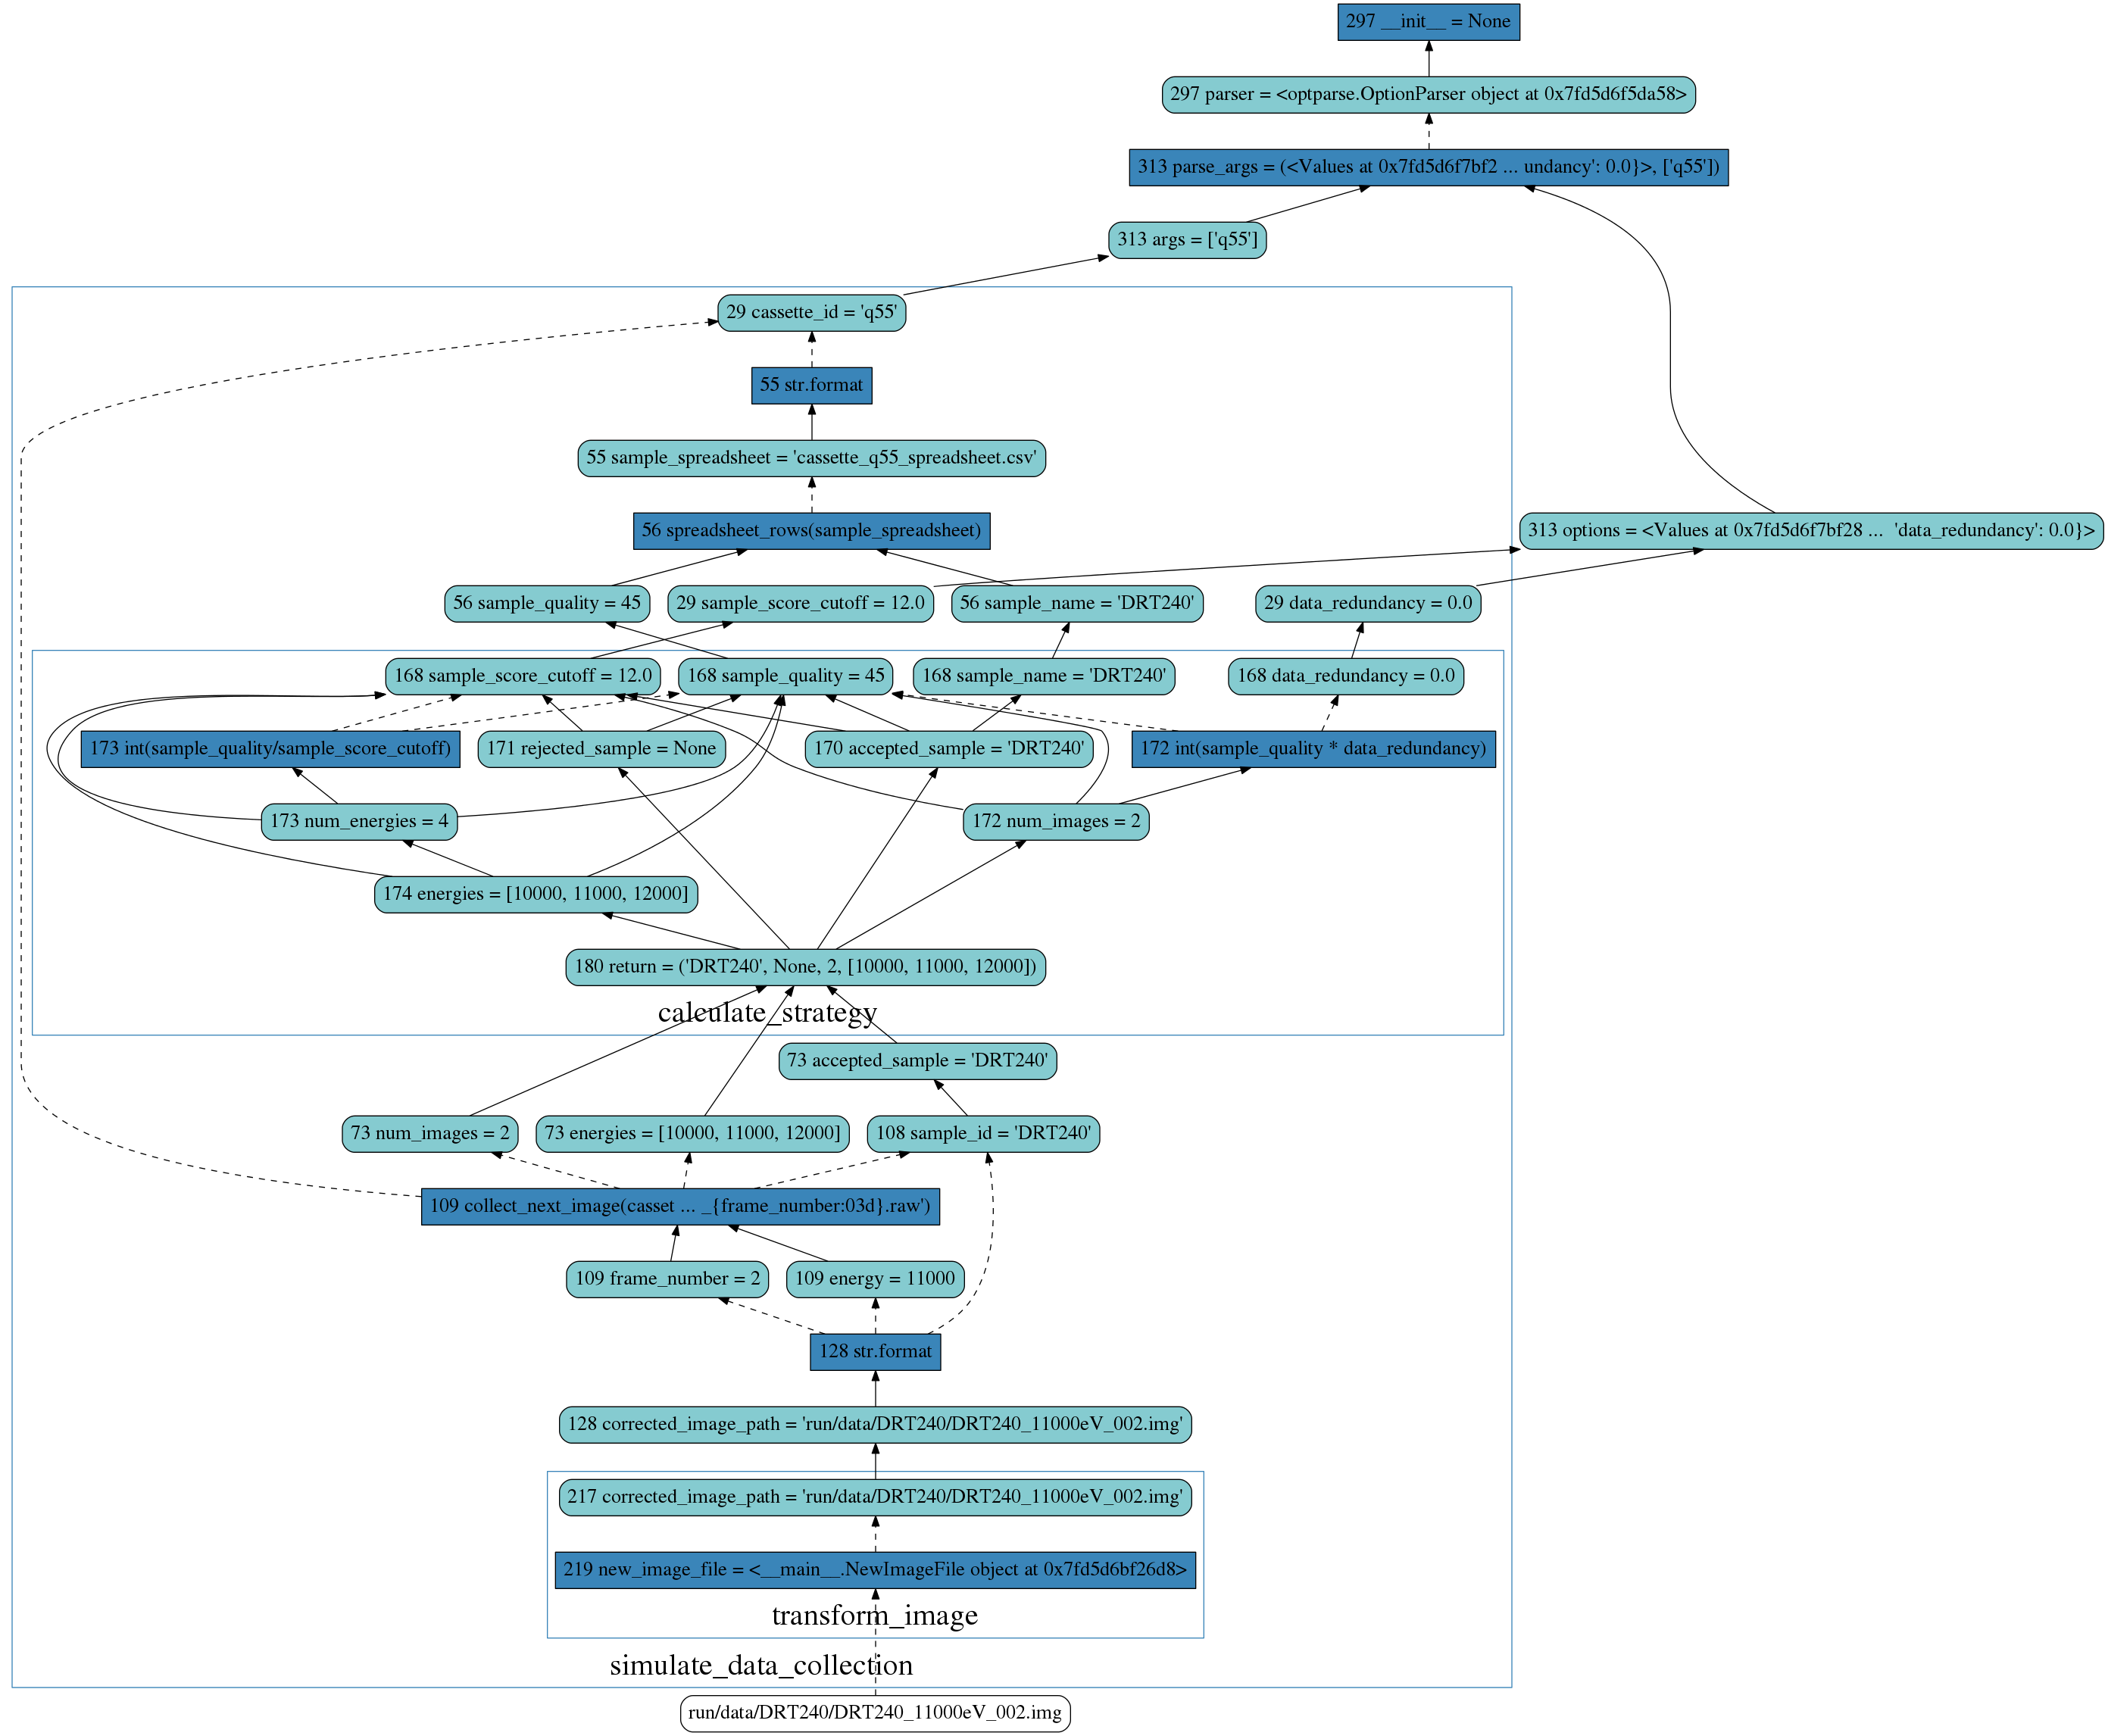

In [8]:
new_result = result.replace("rankdir=RL", "rankdir={}".format(direction)) 
if replace_equal:
    new_result = new_result.replace("=\n", "= ")
call_color = "#3A85B9"
variable_color = "#85CBD0"
file_color = "white"
if color_schema == "YW":
    call_color = "#CCFFCC"
    variable_color = "#FFFFCC"
elif color_schema != "NW":
    call_color, variable_color, file_color = color_schema.split(",")
new_result = (
    new_result
    .replace(
        "#3A85B9",
        call_color
    )
    .replace(
        "#85CBD0",
        variable_color
    )
    .replace(
        'fillcolor="white"',
        'fillcolor="{}"'.format(file_color)
    )
)
loader.show_result(new_result, "png")

In [ ]:
open(output_file, "w").write(new_result)